# Jaival Patel

# Task 2 : Prediction using Unsepervised ML

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Read the Data

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df.shape

(150, 4)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Finding optimal number of custers for Kmeans Classification

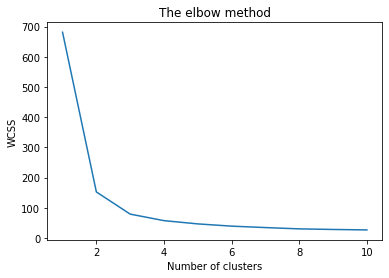

In [9]:
x = iris_df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
           

We choose the number of clusters as 3

# Creating KMeans Classifier

In [13]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',
                max_iter = 300, n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Visualizing Clusters and Plotting Centroids

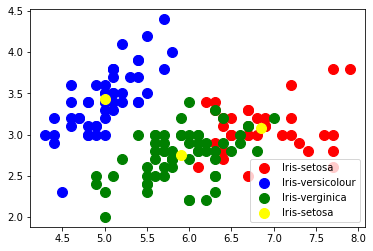

In [15]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
            s = 100, c = 'green', label = 'Iris-verginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.legend()